# Create a functional basis process

The objective of this example is to define
$X: \Omega \times \mathcal{D} \rightarrow \mathbb{R}^d$ a multivariate stochastic
process of dimension $d$ where $\mathcal{D} \in \mathbb{R}^n$, as a linear
combination of $K$ deterministic functions
$(\phi_i)_{i=1,\dots,K}: \mathbb{R}^n \rightarrow \mathbb{R}^d$:

$$\begin{aligned} X(\omega,\underline{t})=\sum_{i=1}^KA_i(\omega)\phi_i(\underline{t})\end{aligned}$$

where $\underline{A}=(A_1,\dots, A_K)$ is a random vector of dimension $K$.

We suppose that $\mathcal{M}$ is discretized on the mesh $\mathcal{M}$ wich has $N$
vertices.

A realization of $X$ on $\mathcal{M}$ consists in generating a realization
$\underline{\alpha}$ of the random vector $\underline{A}$ and in evaluating the
functions $(\phi_i)_{i=1,\dots,K}$ on the mesh $\mathcal{M}$. 

If we note
$(\underline{x}_0, \dots, \underline{x}_{N-1})$ the realization of $X$, where
$X(\omega, \underline{t}_k) = \underline{x}_k$, we have:

$$\begin{aligned} \forall k \in [0, N-1], \quad \underline{x}_k = \sum_{i=1}^K\alpha_i\phi_i(\underline{t}_k)\end{aligned}$$

In [40]:
from __future__ import print_function
import openturns as ot
import math as m

In [41]:
# Define the coefficients distribution
mu = [2.0]*2
sigma = [5.0]*2
R = ot.CorrelationMatrix(2)
coefDist = ot.Normal(mu, sigma, R)

In [42]:
# Create a basis of functions
phi_1 = ot.SymbolicFunction(['t'], ['sin(t)'])
phi_2 = ot.SymbolicFunction(['t'], ['cos(t)^2'])
myBasis = ot.Basis([phi_1, phi_2])

In [43]:
# Create the mesh
myMesh = ot.RegularGrid(0.0, 0.1, 100)

In [44]:
# Create the process
process = ot.FunctionalBasisProcess(coefDist, myBasis, myMesh)

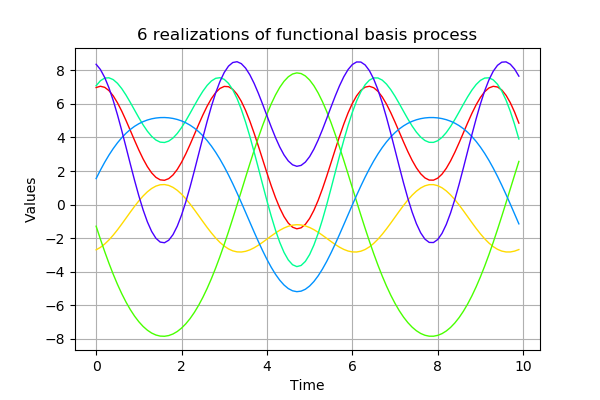

In [45]:
# Draw a sample
N = 6
sample = process.getSample(N)
graph = sample.drawMarginal(0)
graph.setTitle(str(N)+' realizations of functional basis process')
graph